In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\reddy\procurement analysis\Procurement KPI Analysis Dataset.csv")

In [3]:
df.head()

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
0,PO-00001,Alpha_Inc,2023-10-17,2023-10-25,Office Supplies,Cancelled,1176,20.13,17.81,NaN,Yes
1,PO-00002,Delta_Logistics,2022-04-25,2022-05-05,Office Supplies,Delivered,1509,39.32,37.34,235.0,Yes
2,PO-00003,Gamma_Co,2022-01-26,2022-02-15,MRO,Delivered,910,95.51,92.26,41.0,Yes
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344,99.85,95.52,112.0,Yes
4,PO-00005,Delta_Logistics,2022-09-08,2022-09-20,Raw Materials,Delivered,1180,64.07,60.53,171.0,No


In [4]:
df.shape

(777, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PO_ID             777 non-null    object 
 1   Supplier          777 non-null    object 
 2   Order_Date        777 non-null    object 
 3   Delivery_Date     690 non-null    object 
 4   Item_Category     777 non-null    object 
 5   Order_Status      777 non-null    object 
 6   Quantity          777 non-null    int64  
 7   Unit_Price        777 non-null    float64
 8   Negotiated_Price  777 non-null    float64
 9   Defective_Units   641 non-null    float64
 10  Compliance        777 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 66.9+ KB


In [6]:
df[df["Delivery_Date"].isnull()]

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance
13,PO-00014,Beta_Supplies,2022-02-02,NaN,MRO,Delivered,5000,18.30,16.88,NaN,Yes
29,PO-00030,Epsilon_Group,2023-08-27,NaN,MRO,Delivered,1005,80.55,73.31,30.0,Yes
39,PO-00040,Epsilon_Group,2022-12-11,NaN,Office Supplies,Delivered,524,46.28,39.65,14.0,Yes
45,PO-00046,Alpha_Inc,2022-12-19,NaN,Electronics,Delivered,1025,21.11,19.25,15.0,Yes
49,PO-00050,Alpha_Inc,2023-04-16,NaN,MRO,Pending,736,16.20,15.33,18.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
750,PO-00751,Delta_Logistics,2023-04-30,NaN,Electronics,Delivered,1809,13.58,12.68,NaN,No
751,PO-00752,Beta_Supplies,2023-11-17,NaN,Electronics,Cancelled,86,93.60,88.22,5.0,Yes
752,PO-00753,Epsilon_Group,2022-04-28,NaN,MRO,Delivered,1853,21.92,20.72,NaN,Yes
769,PO-00770,Epsilon_Group,2023-08-13,NaN,Office Supplies,Delivered,748,85.95,79.16,32.0,Yes


In [7]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%Y-%m-%d', errors='coerce')
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'], format='%Y-%m-%d', errors='coerce')

In [8]:
median_defect = df[df['Order_Status']=='Delivered']['Defective_Units'].median()
df.loc[df['Order_Status']=='Delivered', 'Defective_Units'] =df.loc[df['Order_Status']=='Delivered', 'Defective_Units'].fillna(median_defect)
df.loc[df['Order_Status']!='Delivered', 'Defective_Units'] = 0

In [9]:
df.isnull().sum()

PO_ID                0
Supplier             0
Order_Date           0
Delivery_Date       87
Item_Category        0
Order_Status         0
Quantity             0
Unit_Price           0
Negotiated_Price     0
Defective_Units      0
Compliance           0
dtype: int64

In [10]:
df.loc[df['Order_Status'] == "Delivered", 'Lead_Time_Days'] = \
    (df['Delivery_Date'] - df['Order_Date']).dt.days

In [11]:
df['Lead_Time_Days']=df['Lead_Time_Days'].fillna(0)

In [12]:
df.isnull().sum()

PO_ID                0
Supplier             0
Order_Date           0
Delivery_Date       87
Item_Category        0
Order_Status         0
Quantity             0
Unit_Price           0
Negotiated_Price     0
Defective_Units      0
Compliance           0
Lead_Time_Days       0
dtype: int64

In [13]:
med=df.loc[(df["Order_Status"]=="Delivered") & (df["Lead_Time_Days"]>0),"Lead_Time_Days"].median()

In [14]:
med

11.0

In [15]:
df.loc[(df["Order_Status"]=="Delivered") & (df["Lead_Time_Days"]==0),"Lead_Time_Days"]=med

In [16]:
df[df["Delivery_Date"].isnull()]

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Lead_Time_Days
13,PO-00014,Beta_Supplies,2022-02-02,NaT,MRO,Delivered,5000,18.30,16.88,47.5,Yes,11.0
29,PO-00030,Epsilon_Group,2023-08-27,NaT,MRO,Delivered,1005,80.55,73.31,30.0,Yes,11.0
39,PO-00040,Epsilon_Group,2022-12-11,NaT,Office Supplies,Delivered,524,46.28,39.65,14.0,Yes,11.0
45,PO-00046,Alpha_Inc,2022-12-19,NaT,Electronics,Delivered,1025,21.11,19.25,15.0,Yes,11.0
49,PO-00050,Alpha_Inc,2023-04-16,NaT,MRO,Pending,736,16.20,15.33,0.0,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
750,PO-00751,Delta_Logistics,2023-04-30,NaT,Electronics,Delivered,1809,13.58,12.68,47.5,No,11.0
751,PO-00752,Beta_Supplies,2023-11-17,NaT,Electronics,Cancelled,86,93.60,88.22,0.0,Yes,0.0
752,PO-00753,Epsilon_Group,2022-04-28,NaT,MRO,Delivered,1853,21.92,20.72,47.5,Yes,11.0
769,PO-00770,Epsilon_Group,2023-08-13,NaT,Office Supplies,Delivered,748,85.95,79.16,32.0,Yes,11.0


In [17]:
df.columns

Index(['PO_ID', 'Supplier', 'Order_Date', 'Delivery_Date', 'Item_Category',
       'Order_Status', 'Quantity', 'Unit_Price', 'Negotiated_Price',
       'Defective_Units', 'Compliance', 'Lead_Time_Days'],
      dtype='object')

In [18]:
df['Quantity'] = df['Quantity'].astype(float)  
df['Unit_Price'] = df['Unit_Price'].astype(float)
df['Negotiated_Price'] = df['Negotiated_Price'].astype(float)
df['Defective_Units'] = df['Defective_Units'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PO_ID             777 non-null    object        
 1   Supplier          777 non-null    object        
 2   Order_Date        777 non-null    datetime64[ns]
 3   Delivery_Date     690 non-null    datetime64[ns]
 4   Item_Category     777 non-null    object        
 5   Order_Status      777 non-null    object        
 6   Quantity          777 non-null    float64       
 7   Unit_Price        777 non-null    float64       
 8   Negotiated_Price  777 non-null    float64       
 9   Defective_Units   777 non-null    float64       
 10  Compliance        777 non-null    object        
 11  Lead_Time_Days    777 non-null    float64       
dtypes: datetime64[ns](2), float64(5), object(5)
memory usage: 73.0+ KB


In [20]:

df['Order_Value'] = df['Unit_Price'] * df['Quantity']

df['Negotiated_Value'] = df['Negotiated_Price'] * df['Quantity']

df['Savings'] = (df['Unit_Price'] - df['Negotiated_Price']) * df['Quantity']
df['Savings_Pct'] = np.where(df['Unit_Price']>0, (df['Unit_Price']-df['Negotiated_Price'])/df['Unit_Price']*100, 0)


In [24]:
df.columns

Index(['PO_ID', 'Supplier', 'Order_Date', 'Delivery_Date', 'Item_Category',
       'Order_Status', 'Quantity', 'Unit_Price', 'Negotiated_Price',
       'Defective_Units', 'Compliance', 'Lead_Time_Days', 'Order_Value',
       'Negotiated_Value', 'Savings', 'Savings_Pct', 'Defect_Rate_Pct'],
      dtype='object')

### Spend Trend

In [28]:
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.to_period('M').astype(str)
df['Quarter'] = df['Order_Date'].dt.to_period('Q').astype(str)

#### Spend Trend by Month

In [29]:
spend_by_month = df.groupby('Month')['Order_Value'].sum().reset_index()
spend_by_month


,Month,Order_Value
0,2022-01,1680734.26
1,2022-02,1509036.57
2,2022-03,2777457.46
3,2022-04,2100009.13
4,2022-05,1272332.44
5,2022-06,1709301.84
6,2022-07,1421425.74
7,2022-08,2505193.90
8,2022-09,2340674.67
9,2022-10,1954260.89


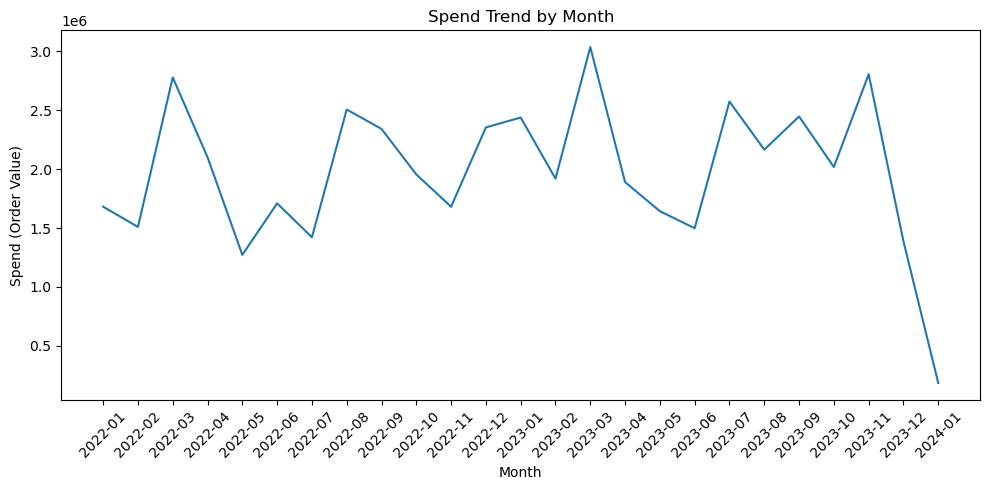

In [30]:
plt.figure(figsize=(10,5))
plt.plot(spend_by_month['Month'], spend_by_month['Order_Value'])
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Spend (Order Value)")
plt.title("Spend Trend by Month")
plt.tight_layout()
plt.show()


In [31]:
df[df['Year']==2024]

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Lead_Time_Days,Order_Value,Negotiated_Value,Savings,Savings_Pct,Defect_Rate_Pct,Year,Month,Quarter
210,PO-00211,Gamma_Co,2024-01-01,NaT,Office Supplies,Delivered,1233.0,86.62,76.59,65.0,Yes,11.0,106802.46,94435.47,12366.99,11.579312,5.271695,2024,2024-01,2024Q1
649,PO-00650,Delta_Logistics,2024-01-01,2024-01-04,Electronics,Pending,1327.0,59.57,56.44,0.0,Yes,0.0,79049.39,74895.88,4153.51,5.254323,0.000000,2024,2024-01,2024Q1


In [39]:
top3 = (
    spend_by_month
    .sort_values('Order_Value', ascending=False)
    .head(3)
)
top3


,Month,Order_Value
14,2023-03,3034568.41
22,2023-11,2804164.75
2,2022-03,2777457.46


In [47]:
df_march_2023=df[df["Month"]=="2023-03"]
df_nov_2023=df[df["Month"]=="2023-11"]
df_march_2022=df[df["Month"]=="2022-03"]

In [45]:
df_march_2023.groupby("Supplier")["Order_Value"].sum().sort_values(ascending=False)


Supplier
Beta_Supplies      850096.83
Epsilon_Group      789919.72
Delta_Logistics    627400.93
Alpha_Inc          474570.71
Gamma_Co           292580.22
Name: Order_Value, dtype: float64

In [46]:
df_march_2023.groupby("Item_Category")["Order_Value"] \
             .sum() \
             .sort_values(ascending=False)


Item_Category
Electronics        1461361.85
Raw Materials       566269.12
MRO                 425335.13
Packaging           323997.11
Office Supplies     257605.20
Name: Order_Value, dtype: float64

In [49]:
df_nov_2023.groupby("Supplier")["Order_Value"] \
           .sum() \
           .sort_values(ascending=False)


Supplier
Gamma_Co           851064.26
Delta_Logistics    661880.05
Epsilon_Group      567889.59
Alpha_Inc          369815.02
Beta_Supplies      353515.83
Name: Order_Value, dtype: float64

In [50]:
df_nov_2023.groupby("Item_Category")["Order_Value"] \
           .sum() \
           .sort_values(ascending=False)


Item_Category
Packaging          705978.65
MRO                678815.38
Office Supplies    579084.06
Raw Materials      482097.36
Electronics        358189.30
Name: Order_Value, dtype: float64

In [52]:
df_march_2022.groupby("Supplier")["Order_Value"] \
           .sum() \
           .sort_values(ascending=False)

Supplier
Gamma_Co           883617.34
Epsilon_Group      819074.65
Delta_Logistics    647060.76
Beta_Supplies      334173.05
Alpha_Inc           93531.66
Name: Order_Value, dtype: float64

In [54]:
df_march_2022.groupby("Item_Category")["Order_Value"] \
           .sum() \
           .sort_values(ascending=False)

Item_Category
Raw Materials      992017.88
MRO                595468.92
Packaging          577452.72
Office Supplies    351353.75
Electronics        261164.19
Name: Order_Value, dtype: float64

### Trend analysis

1. General Trend

Spend fluctuates month-on-month with multiple spikes but no clear linear upward/downward trend.

However, seasonal patterns are visible:

March is consistently a high-spend month (top 2 peaks are in March 2023 & March 2022).

Year-end months (Nov–Dec) also show above-average spend.

Early 2024 shows a drop due to only 2 orders recorded, not an actual decrease.

📈 Spend Pattern Summary

Highest month overall: March 2023 – 3.03M

Other big months:

Nov 2023 – 2.80M

Mar 2022 – 2.77M

Aug 2022 – 2.50M

Jul 2023 – 2.57M

Lowest month: Jan 2024 – 185k (only 2 POs)

#### March 2023

nsights — Why Spend Was High

Electronics had a major demand spike, contributing nearly half of March spend.

Beta_Supplies & Epsilon_Group alone contributed 1.64M — strong supplier-driven spike.

Mix of high-value items + high volumes caused the surge.

Likely represents quarter-end procurement push (common business pattern).

#### November 2023

Spend is more evenly distributed across categories compared to March 2023.

Packaging + MRO are the main spike drivers (combined: 1.38M).

Gamma_Co was the biggest supplier contributor.

Indicates:

Inventory restocking before financial closing

Possibly higher project execution activities requiring Packaging & MRO

#### March 2022

Insights

Raw Materials peaked (nearly 1M), leading the overall spike.

Supplier-heavy concentration:

Gamma_Co + Epsilon_Group ≈ 1.7M → 60% of month spend.

Similar pattern to March 2023: March is always heavy.

This clearly suggests a recurring annual cycle:

Big procurement happens in March (year-end, project closure, budget utilization).

### overall trend insights

1. March is consistently the highest-spend month.

Top 1 (2023-03) and Top 3 (2022-03) are both March.

Likely due to:

Year-end budget utilization

Quarter-end project closures

Bulk ordering cycles

2. Supplier concentration is very strong.

Across all peak months:

Gamma_Co

Epsilon_Group

Delta_Logistics

Beta_Supplies

These 4 suppliers contribute ~70% of total spend in peak months.

→ HIGH supplier dependency → Risk in procurement.

3. Category spikes are different per month.

March 2023 → Electronics-heavy

Nov 2023 → Packaging + MRO

March 2022 → Raw Materials

→ Spend spikes are not random; each is linked to specific operational needs.

4. 2024 is not a low-spend year — data is incomplete (only 2 POs).

Do not conclude cost saving.

Real reason = limited transactions.

5. Spend variability is normal but slightly volatile.

Monthly fluctuations indicate:

Seasonal procurement

Project-driven purchases

No strict monthly budgeting cycle

6. Opportunities Identified

Supplier optimization: Too much spend concentrated in 3 suppliers.

Better category planning: Electronics and Raw Materials drive spikes — can negotiate volumes.

Forecasting: Easy to predict peak months (March + November).

Inventory planning: MRO & Packaging spikes suggest batch restocking.

In [21]:
df['Savings_Pct'].value_counts()

Savings_Pct
11.525087    1
11.054367    1
13.960650    1
12.615653    1
9.745714     1
            ..
13.547328    1
7.567880     1
11.669291    1
8.119002     1
11.378327    1
Name: count, Length: 777, dtype: int64

The company never paid more than the original unit price.

All negotiated prices are either equal to or lower than the listed unit price.

There’s no price leakage in your dataset.

In [22]:
df['Defect_Rate_Pct'] = (df['Defective_Units'] / df['Quantity'])* 100

In [23]:
supplier_defect = df.groupby('Supplier').apply(
    lambda g: (g['Defective_Units'].sum() / g['Quantity'].sum())*100
).rename('Supplier_Defect_Rate_Pct').reset_index()

supplier_defect.sort_values('Supplier_Defect_Rate_Pct')


C:\Users\reddy\AppData\Local\Temp\ipykernel_19924\2007444005.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  supplier_defect = df.groupby('Supplier').apply(


,Supplier,Supplier_Defect_Rate_Pct
0,Alpha_Inc,2.062640
3,Epsilon_Group,2.292103
4,Gamma_Co,3.636744
1,Beta_Supplies,5.712236
2,Delta_Logistics,8.270759


Delta_Logistics → 8.27% defect rate

Means 8.27% of units delivered by Delta_Logistics are defective.

Highest among all suppliers → indicates quality issues.

Needs attention: investigate why so many defects, renegotiate, or monitor closely.

Alpha_Inc & Epsilon_Group → 2-2.3% defect rate

Lowest defects → high-quality suppliers.

Likely reliable, can be considered for strategic sourcing.

Beta_Supplies → 5.71%

Medium risk supplier → monitor trends, maybe audit their process.

In [81]:
overall_median_lead = df.loc[df['Order_Status']=='Delivered', 'Lead_Time_Days'].median()


In [84]:
supplier_delivery = df[df['Order_Status']=='Delivered'].groupby('Supplier').agg(
    Avg_Lead=('Lead_Time_Days','mean'),
    Median_Lead=('Lead_Time_Days','median'),
    Count_Delivered=('PO_ID','count'),
    OnTime_Count=('Lead_Time_Days', lambda x: (x <= overall_median_lead).sum())
).reset_index()
supplier_delivery['OnTime_Rate_Pct'] = supplier_delivery['OnTime_Count'] / supplier_delivery['Count_Delivered'] * 100
supplier_delivery = supplier_delivery.sort_values('Avg_Lead')


In [85]:
supplier_delivery

,Supplier,Avg_Lead,Median_Lead,Count_Delivered,OnTime_Count,OnTime_Rate_Pct
4,Gamma_Co,10.009709,10.0,103,67,65.048544
2,Delta_Logistics,10.375000,11.0,120,77,64.166667
3,Epsilon_Group,10.541667,11.0,120,70,58.333333
0,Alpha_Inc,10.616822,11.0,107,64,59.813084
1,Beta_Supplies,11.209091,11.0,110,56,50.909091


Gamma_Co has the fastest average delivery (10.01 days) and median (10 days).

Delta_Logistics has the highest on-time count (77 out of 120), meaning most of its deliveries are faster than the overall median.

Beta_Supplies has a slightly slower average (11.21 days) and fewer on-time deliveries (56), so it's underperforming relative to others.

Even suppliers with similar median (like Alpha_Inc, Beta_Supplies, Delta_Logistics, Epsilon_Group) have different averages and on-time counts, which shows some variability in their delivery consistency.

In [87]:
df.columns

Index(['PO_ID', 'Supplier', 'Order_Date', 'Delivery_Date', 'Item_Category',
       'Order_Status', 'Quantity', 'Unit_Price', 'Negotiated_Price',
       'Defective_Units', 'Compliance', 'Lead_Time_Days', 'Savings',
       'Order_Value', 'Negotiated_Value', 'Savings_Pct', 'Defect_Rate_Pct'],
      dtype='object')

In [88]:
df['Compliance'].value_counts()


Compliance
Yes    640
No     137
Name: count, dtype: int64

In [89]:
df['Compliance_Flag'] = df['Compliance'].map({'Yes':1,'No':0})

In [90]:
overall_compliance_pct = df['Compliance_Flag'].mean() * 100

In [91]:
overall_compliance_pct

82.36808236808237

In [92]:
supplier_compliance = df.groupby('Supplier')['Compliance_Flag'].mean().rename('Supplier_Compliance_Pct').reset_index()
supplier_compliance['Supplier_Compliance_Pct'] *= 100

In [93]:
supplier_compliance

,Supplier,Supplier_Compliance_Pct
0,Alpha_Inc,93.617021
1,Beta_Supplies,75.641026
2,Delta_Logistics,60.818713
3,Epsilon_Group,98.192771
4,Gamma_Co,86.013986


In [94]:
# Top suppliers by spend
supplier_spend = df.groupby('Supplier').agg(
    Total_Spent=('Order_Value','sum'),
    Total_Negotiated=('Negotiated_Value','sum'),
    Total_Orders=('PO_ID','count'),
    Avg_Order_Value=('Order_Value','mean')
).reset_index().sort_values('Total_Spent', ascending=False)

In [95]:
supplier_spend

,Supplier,Total_Spent,Total_Negotiated,Total_Orders,Avg_Order_Value
1,Beta_Supplies,10748606.79,9858665.90,156,68901.325577
3,Epsilon_Group,10696136.24,9851156.06,166,64434.555663
2,Delta_Logistics,10018216.96,9236240.47,171,58586.064094
4,Gamma_Co,9313230.13,8587921.71,143,65127.483427
0,Alpha_Inc,8528632.74,7839712.25,141,60486.757021


In [98]:

supplier_savings = df.groupby('Supplier').agg(
    Total_Savings=('Savings','sum'),
    Avg_Savings_Per_PO=('Savings','mean'),
    Avg_Savings_Pct=('Savings_Pct','mean'),
    Total_Orders=('PO_ID','count')
).reset_index()

# Sort suppliers by total savings descending
supplier_savings = supplier_savings.sort_values("Avg_Savings_Pct", ascending=False)
supplier_savings


,Supplier,Total_Savings,Avg_Savings_Per_PO,Avg_Savings_Pct,Total_Orders
0,Alpha_Inc,688920.49,4885.960922,8.210459,141
3,Epsilon_Group,844980.18,5090.242048,8.040521,166
4,Gamma_Co,725308.42,5072.086853,7.984856,143
1,Beta_Supplies,889940.89,5704.749295,7.827699,156
2,Delta_Logistics,781976.49,4572.961930,7.811977,171


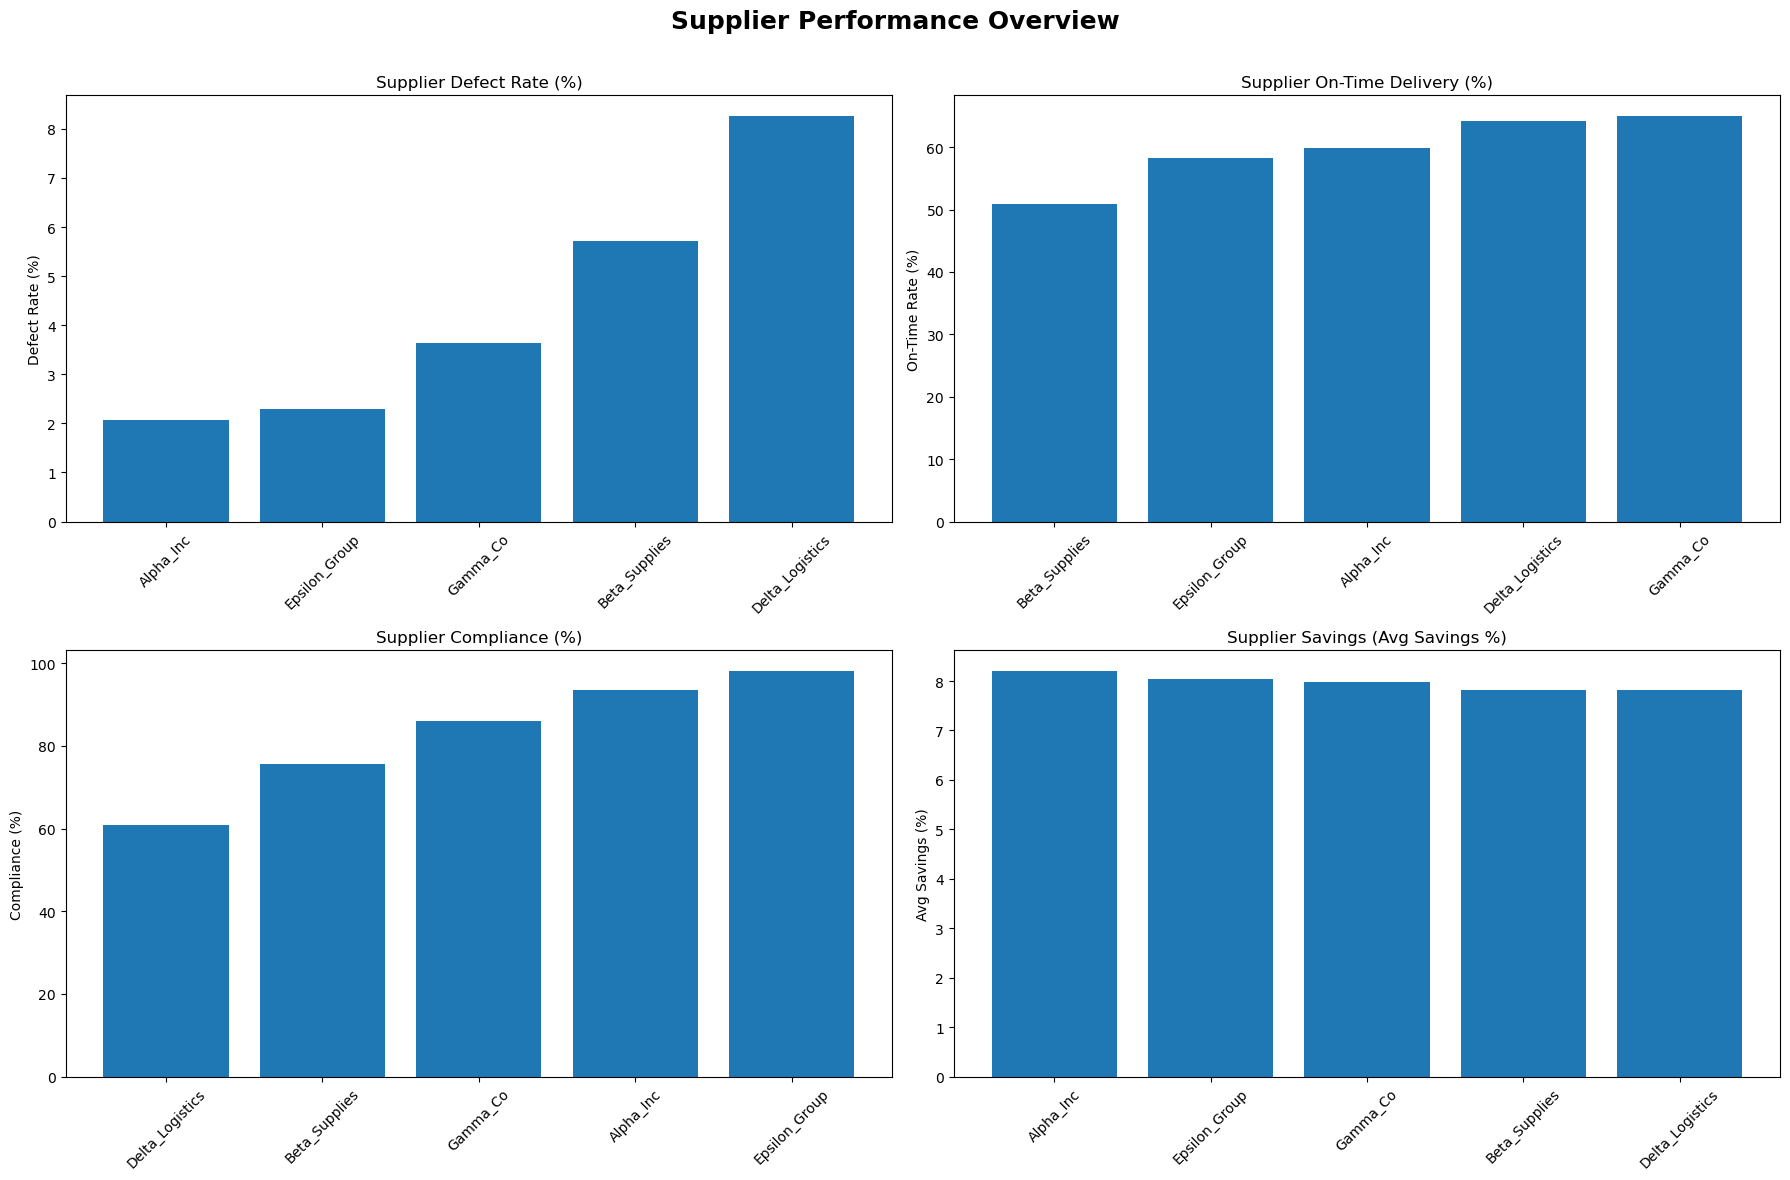

In [111]:
import matplotlib.pyplot as plt

# --- SORTED TABLES ---
supplier_defect_sorted = supplier_defect.sort_values("Supplier_Defect_Rate_Pct")
supplier_delivery_sorted = supplier_delivery.sort_values("OnTime_Rate_Pct")
supplier_compliance_sorted = supplier_compliance.sort_values("Supplier_Compliance_Pct")
supplier_savings_sorted = supplier_savings.sort_values("Avg_Savings_Pct", ascending=False)

# --- PLOTTING ---
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Supplier Performance Overview", fontsize=18, fontweight='bold')

# 1️⃣ Supplier Defect Rate %
axes[0,0].bar(
    supplier_defect_sorted["Supplier"],
    supplier_defect_sorted["Supplier_Defect_Rate_Pct"]
)
axes[0,0].set_title("Supplier Defect Rate (%)")
axes[0,0].set_ylabel("Defect Rate (%)")
axes[0,0].tick_params(axis='x', rotation=45)

# 2️⃣ Supplier On-Time Delivery Rate %
axes[0,1].bar(
    supplier_delivery_sorted["Supplier"],
    supplier_delivery_sorted["OnTime_Rate_Pct"]
)
axes[0,1].set_title("Supplier On-Time Delivery (%)")
axes[0,1].set_ylabel("On-Time Rate (%)")
axes[0,1].tick_params(axis='x', rotation=45)

# 3️⃣ Supplier Compliance %
axes[1,0].bar(
    supplier_compliance_sorted["Supplier"],
    supplier_compliance_sorted["Supplier_Compliance_Pct"]
)
axes[1,0].set_title("Supplier Compliance (%)")
axes[1,0].set_ylabel("Compliance (%)")
axes[1,0].tick_params(axis='x', rotation=45)

# 4️⃣ Supplier Savings (Avg Savings %)
axes[1,1].bar(
    supplier_savings_sorted["Supplier"],
    supplier_savings_sorted["Avg_Savings_Pct"]
)
axes[1,1].set_title("Supplier Savings (Avg Savings %)")
axes[1,1].set_ylabel("Avg Savings (%)")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [101]:
# Merge supplier metrics including savings
supplier_metrics = supplier_spend.merge(supplier_defect, on='Supplier', how='left')\
                                 .merge(supplier_delivery[['Supplier','Avg_Lead','OnTime_Rate_Pct']], on='Supplier', how='left')\
                                 .merge(supplier_compliance, on='Supplier', how='left')\
                                 .merge(supplier_savings[['Supplier','Total_Savings','Avg_Savings_Pct']], on='Supplier', how='left')

# Normalize columns (min-max scaling)
for col in ['Total_Spent','Supplier_Defect_Rate_Pct','Avg_Lead','OnTime_Rate_Pct','Supplier_Compliance_Pct','Total_Savings','Avg_Savings_Pct']:
    supplier_metrics[col+'_norm'] = (supplier_metrics[col] - supplier_metrics[col].min()) / (supplier_metrics[col].max() - supplier_metrics[col].min() + 1e-9)

# Build composite score
# Example weights: OnTime 25%, Defect 20% (lower is better), Compliance 20%, Avg Lead 15% (lower is better), Total Savings 20%
supplier_metrics['Score'] = (
    0.25 * supplier_metrics['OnTime_Rate_Pct_norm'] +
    0.20 * (1 - supplier_metrics['Supplier_Defect_Rate_Pct_norm']) +
    0.20 * supplier_metrics['Supplier_Compliance_Pct_norm'] +
    0.15 * (1 - supplier_metrics['Avg_Lead_norm']) +
    0.20 * supplier_metrics['Total_Savings_norm']  # reward high savings
)

# Sort descending — highest score = best supplier
supplier_metrics = supplier_metrics.sort_values('Score', ascending=False)

# Show all 5 suppliers
supplier_metrics[['Supplier','Score','Total_Savings','Avg_Savings_Pct','Supplier_Defect_Rate_Pct','Avg_Lead','OnTime_Rate_Pct','Supplier_Compliance_Pct']]


,Supplier,Score,Total_Savings,Avg_Savings_Pct,Supplier_Defect_Rate_Pct,Avg_Lead,OnTime_Rate_Pct,Supplier_Compliance_Pct
1,Epsilon_Group,0.762614,844980.18,8.040521,2.292103,10.541667,58.333333,98.192771
3,Gamma_Co,0.720320,725308.42,7.984856,3.636744,10.009709,65.048544,86.013986
4,Alpha_Inc,0.607017,688920.49,8.210459,2.062640,10.616822,59.813084,93.617021
2,Delta_Logistics,0.431306,781976.49,7.811977,8.270759,10.375000,64.166667,60.818713
0,Beta_Supplies,0.361744,889940.89,7.827699,5.712236,11.209091,50.909091,75.641026


In [112]:
# Category spend & defect patterns
category_summary = df.groupby('Item_Category').agg(
    Total_Spent=('Order_Value','sum'),
    Count_PO=('PO_ID','count'),
    Avg_Lead=('Lead_Time_Days','mean'),
    Defect_Rate_Pct=('Defect_Rate_Pct','mean'),
    Avg_Savings_Pct=('Savings_Pct','mean')
).reset_index().sort_values('Total_Spent', ascending=False)

In [113]:
category_summary

,Item_Category,Total_Spent,Count_PO,Avg_Lead,Defect_Rate_Pct,Avg_Savings_Pct
1,MRO,11028921.17,164,8.560976,4.724481,8.211056
2,Office Supplies,10851679.19,174,7.178161,5.482750,7.658579
0,Electronics,9385426.83,152,7.671053,5.226179,7.722124
4,Raw Materials,9180338.67,139,7.798561,5.502782,7.835687
3,Packaging,8858457.00,148,6.804054,4.337907,8.439699


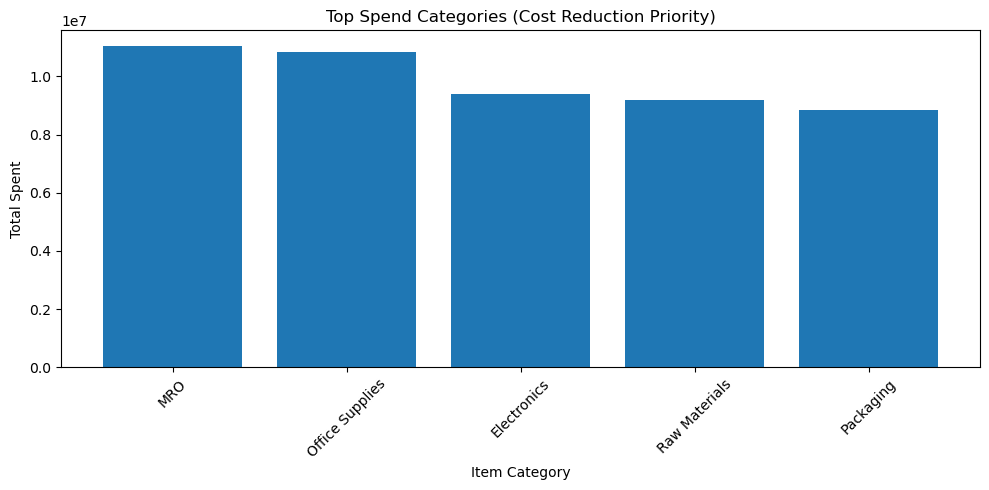

In [115]:
plt.figure(figsize=(10,5))
plt.bar(category_summary['Item_Category'], category_summary['Total_Spent'])
plt.title("Top Spend Categories (Cost Reduction Priority)")
plt.xlabel("Item Category")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [103]:
summary = {
    'Total_POs': len(df),
    'Total_Spend': df['Order_Value'].sum(),
    'Avg_Lead_Time_Days': df.loc[df['Order_Status']=='Delivered','Lead_Time_Days'].mean(),
    'Median_Lead_Time_Days': df.loc[df['Order_Status']=='Delivered','Lead_Time_Days'].median(),
    'Overall_Defect_Rate_Pct': df['Defective_Units'].sum() / df['Quantity'].sum() * 100,
    'Overall_Compliance_Pct': df['Compliance_Flag'].mean() * 100,
    'Total_Savings': df['Savings'].sum()
}
pd.Series(summary)
summary_series = pd.Series(summary)
summary_series_rounded = summary_series.round(2)
print(summary_series_rounded)




Total_POs                       777.00
Total_Spend                49304822.86
Avg_Lead_Time_Days               10.55
Median_Lead_Time_Days            11.00
Overall_Defect_Rate_Pct           4.50
Overall_Compliance_Pct           82.37
Total_Savings               3931126.47
dtype: float64


In [105]:

price_violations = df[df['Unit_Price'] < df['Negotiated_Price']]
price_violations




,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Lead_Time_Days,Savings,Order_Value,Negotiated_Value,Savings_Pct,Defect_Rate_Pct,Compliance_Flag


In [109]:

high_defect_pos = df[df['Defect_Rate_Pct'] > 10].sort_values('Defect_Rate_Pct', ascending=False)


In [110]:
high_defect_pos

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Lead_Time_Days,Savings,Order_Value,Negotiated_Value,Savings_Pct,Defect_Rate_Pct,Compliance_Flag
453,PO-00454,Epsilon_Group,2022-04-16,2022-04-27,Electronics,Delivered,66.0,58.05,50.76,47.5,Yes,11.0,481.14,3831.30,3350.16,12.558140,71.969697,1
523,PO-00524,Alpha_Inc,2023-07-06,2023-07-18,Office Supplies,Delivered,69.0,107.47,105.53,47.5,Yes,12.0,133.86,7415.43,7281.57,1.805155,68.840580,1
203,PO-00204,Alpha_Inc,2023-06-25,NaT,Office Supplies,Delivered,280.0,72.16,62.38,100.0,Yes,11.0,2738.40,20204.80,17466.40,13.553215,35.714286,1
461,PO-00462,Delta_Logistics,2022-07-01,NaT,MRO,Delivered,148.0,44.91,40.10,47.5,No,11.0,711.88,6646.68,5934.80,10.710310,32.094595,0
19,PO-00020,Delta_Logistics,2023-09-09,2023-09-24,Raw Materials,Delivered,180.0,45.74,38.89,47.5,No,15.0,1233.00,8233.20,7000.20,14.975951,26.388889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,PO-00113,Beta_Supplies,2023-05-27,2023-06-11,Raw Materials,Delivered,1775.0,47.82,45.86,180.0,Yes,15.0,3479.00,84880.50,81401.50,4.098703,10.140845,1
175,PO-00176,Beta_Supplies,2023-01-18,2023-01-27,Raw Materials,Delivered,692.0,71.03,67.74,70.0,Yes,9.0,2276.68,49152.76,46876.08,4.631846,10.115607,1
464,PO-00465,Beta_Supplies,2022-07-03,2022-07-19,MRO,Delivered,1110.0,48.19,45.88,112.0,Yes,16.0,2564.10,53490.90,50926.80,4.793526,10.090090,1
686,PO-00687,Beta_Supplies,2023-03-06,2023-03-07,Packaging,Delivered,1006.0,27.70,23.66,101.0,No,1.0,4064.24,27866.20,23801.96,14.584838,10.039761,0


In [117]:
top10_defects = high_defect_pos.sort_values('Defect_Rate_Pct', ascending=False).head(10)



In [118]:
top10_defects

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Lead_Time_Days,Savings,Order_Value,Negotiated_Value,Savings_Pct,Defect_Rate_Pct,Compliance_Flag
453,PO-00454,Epsilon_Group,2022-04-16,2022-04-27,Electronics,Delivered,66.0,58.05,50.76,47.5,Yes,11.0,481.14,3831.30,3350.16,12.558140,71.969697,1
523,PO-00524,Alpha_Inc,2023-07-06,2023-07-18,Office Supplies,Delivered,69.0,107.47,105.53,47.5,Yes,12.0,133.86,7415.43,7281.57,1.805155,68.840580,1
203,PO-00204,Alpha_Inc,2023-06-25,NaT,Office Supplies,Delivered,280.0,72.16,62.38,100.0,Yes,11.0,2738.40,20204.80,17466.40,13.553215,35.714286,1
461,PO-00462,Delta_Logistics,2022-07-01,NaT,MRO,Delivered,148.0,44.91,40.10,47.5,No,11.0,711.88,6646.68,5934.80,10.710310,32.094595,0
19,PO-00020,Delta_Logistics,2023-09-09,2023-09-24,Raw Materials,Delivered,180.0,45.74,38.89,47.5,No,15.0,1233.00,8233.20,7000.20,14.975951,26.388889,0
315,PO-00316,Beta_Supplies,2022-08-11,2022-08-25,Packaging,Delivered,193.0,63.86,57.46,47.5,Yes,14.0,1235.20,12324.98,11089.78,10.021923,24.611399,1
545,PO-00546,Epsilon_Group,2023-07-22,2023-07-25,Raw Materials,Delivered,199.0,51.98,45.64,47.5,No,3.0,1261.66,10344.02,9082.36,12.196999,23.869347,0
624,PO-00625,Delta_Logistics,2023-11-15,2023-11-16,Electronics,Delivered,203.0,23.14,20.00,47.5,No,1.0,637.42,4697.42,4060.00,13.569576,23.399015,0
739,PO-00740,Delta_Logistics,2022-03-12,2022-03-19,MRO,Delivered,241.0,87.42,82.15,47.5,Yes,7.0,1270.07,21068.22,19798.15,6.028369,19.709544,1
300,PO-00301,Delta_Logistics,2022-06-18,2022-06-26,Office Supplies,Delivered,252.0,73.12,67.64,47.5,No,8.0,1380.96,18426.24,17045.28,7.494530,18.849206,0


In [106]:

risky_orders = df[(df['Order_Value'] > df['Order_Value'].quantile(0.75)) & (df['Lead_Time_Days'] > df['Lead_Time_Days'].quantile(0.75))]

In [107]:
risky_orders

,PO_ID,Supplier,Order_Date,Delivery_Date,Item_Category,Order_Status,Quantity,Unit_Price,Negotiated_Price,Defective_Units,Compliance,Lead_Time_Days,Savings,Order_Value,Negotiated_Value,Savings_Pct,Defect_Rate_Pct,Compliance_Flag
3,PO-00004,Beta_Supplies,2022-10-09,2022-10-28,Packaging,Delivered,1344.0,99.85,95.52,112.0,Yes,19.0,5819.52,134198.40,128378.88,4.336505,8.333333,1
10,PO-00011,Epsilon_Group,2022-03-31,2022-04-15,Raw Materials,Delivered,5000.0,78.49,73.68,18.0,Yes,15.0,24050.00,392450.00,368400.00,6.128169,0.360000,1
11,PO-00012,Beta_Supplies,2023-08-28,2023-09-11,Raw Materials,Delivered,5000.0,88.96,86.58,115.0,Yes,14.0,11900.00,444800.00,432900.00,2.675360,2.300000,1
28,PO-00029,Delta_Logistics,2023-04-05,2023-04-22,MRO,Delivered,1265.0,90.26,79.47,187.0,Yes,17.0,13649.35,114178.90,100529.55,11.954354,14.782609,1
38,PO-00039,Epsilon_Group,2022-08-09,2022-08-23,Office Supplies,Delivered,1634.0,80.53,76.15,50.0,Yes,14.0,7156.92,131586.02,124429.10,5.438967,3.059976,1
74,PO-00075,Epsilon_Group,2023-01-09,2023-01-28,Raw Materials,Delivered,1413.0,70.47,69.65,47.5,Yes,19.0,1158.66,99574.11,98415.45,1.163616,3.361642,1
76,PO-00077,Alpha_Inc,2023-01-15,2023-02-04,Office Supplies,Delivered,1440.0,96.57,83.87,36.0,Yes,20.0,18288.00,139060.80,120772.80,13.151082,2.500000,1
114,PO-00115,Beta_Supplies,2023-10-21,2023-11-09,Electronics,Delivered,1798.0,94.80,91.83,47.5,Yes,19.0,5340.06,170450.40,165110.34,3.132911,2.641824,1
127,PO-00128,Epsilon_Group,2023-01-06,2023-01-24,Electronics,Delivered,1114.0,91.66,85.53,35.0,Yes,18.0,6828.82,102109.24,95280.42,6.687759,3.141831,1
135,PO-00136,Beta_Supplies,2022-06-06,2022-06-26,Raw Materials,Delivered,1417.0,67.27,60.62,47.5,Yes,20.0,9423.05,95321.59,85898.54,9.885536,3.352152,1


In [108]:
len(risky_orders)

35